In [24]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Read the CSV file into a DataFrame
data = pd.read_csv('train.csv')

In [26]:
# Clean the dataset and drop columns that are not needed.
data = data.drop(columns=['Soil_Type{}'.format(i) for i in range(1, 41)])
data = data.drop(columns=['Id'])

In [27]:
# Map the cover type values to their corresponding names
cover_type_names = {
    1: 'Spruce/Fir',
    2: 'Lodgepole Pine',
    3: 'Ponderosa Pine',
    4: 'Cottonwood/Willow',
    5: 'Aspen',
    6: 'Douglas-fir',
    7: 'Krummholz'
}
data['Cover_Type'] = data['Cover_Type'].map(cover_type_names)

In [28]:
# Group the data by 'Cover_Type'
grouped_data = data.groupby('Cover_Type').mean()

In [29]:
# Transpose the grouped data to swap the axes
transposed_data = grouped_data.transpose()

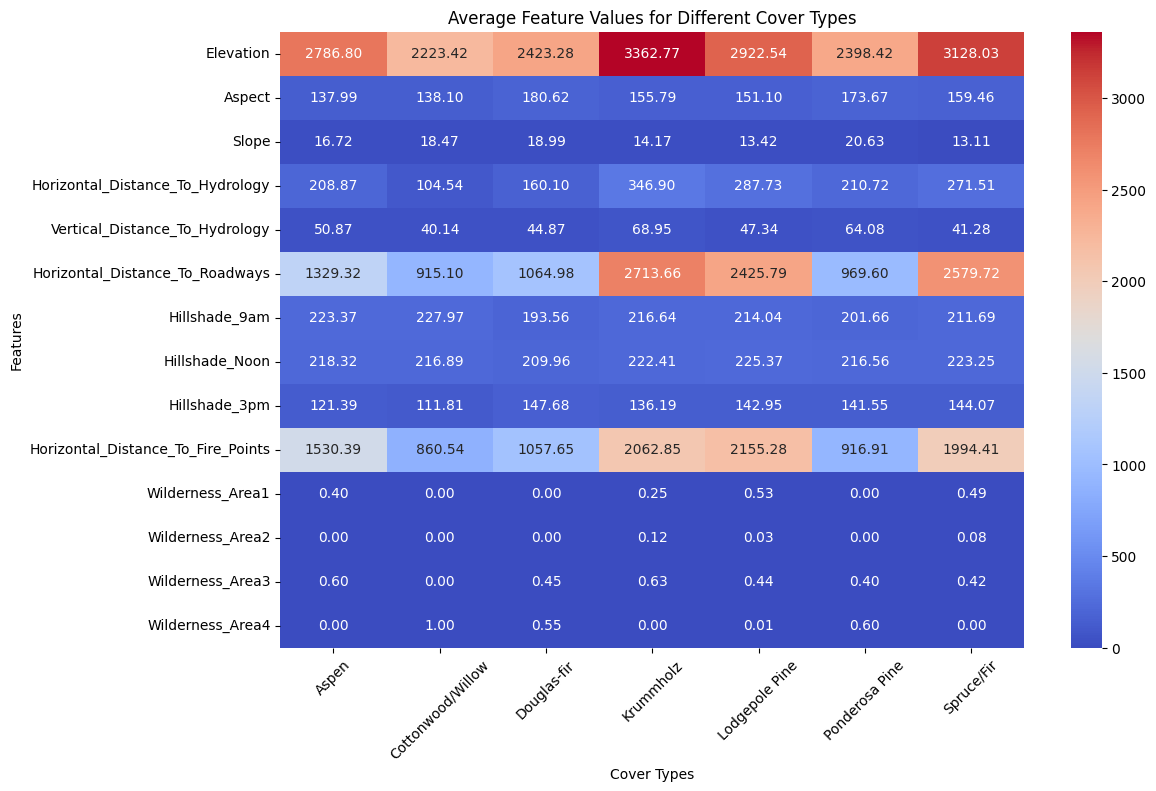

In [31]:
# Create a heatmap for all cover types
plt.figure(figsize=(12, 8))
sns.heatmap(transposed_data, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Average Feature Values for Different Cover Types')
plt.xticks(rotation=45)
plt.xlabel('Cover Types')
plt.ylabel('Features')
plt.show()

In [32]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

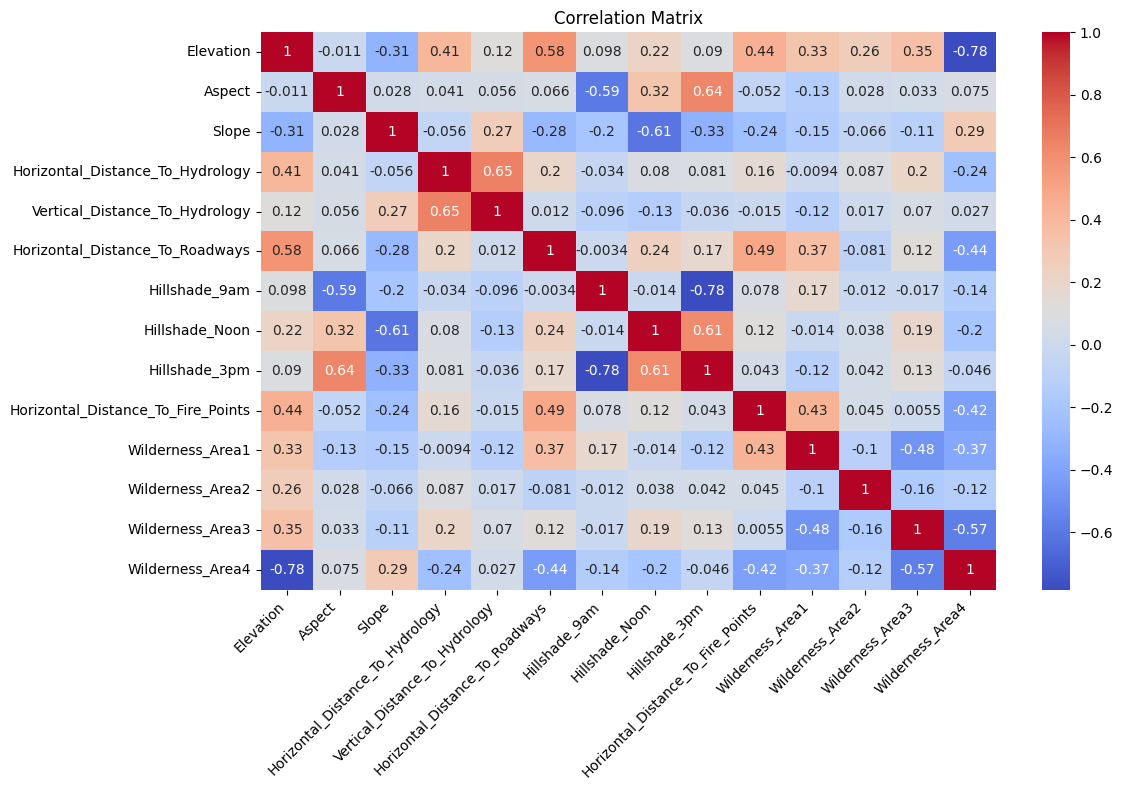

In [35]:
# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

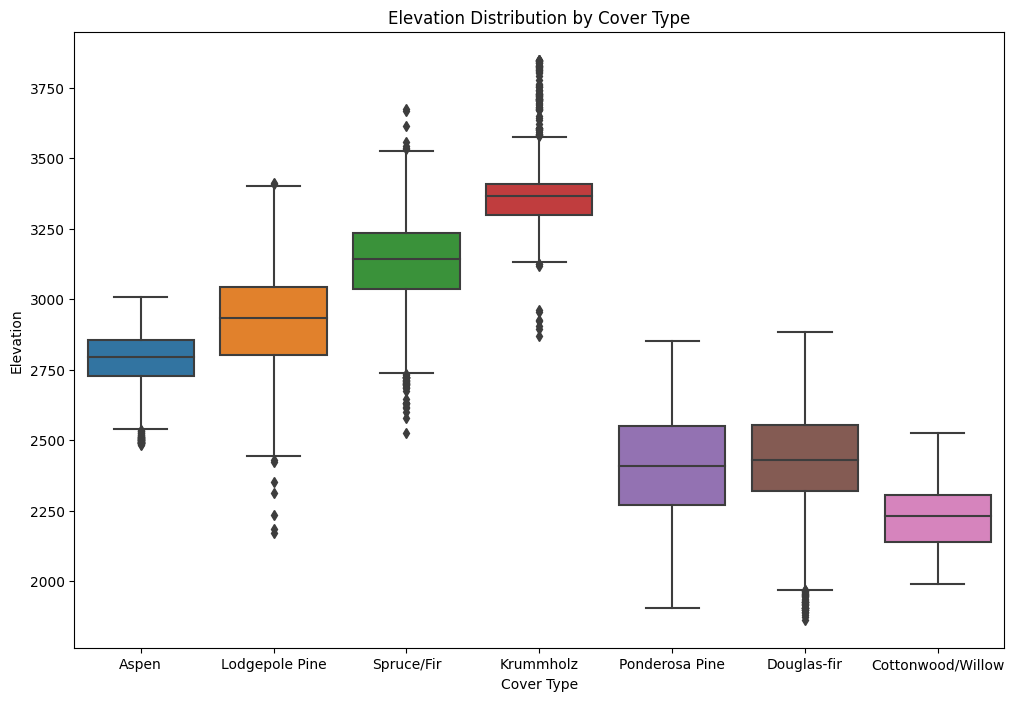

In [37]:
# Create a box plot for each numerical feature grouped by 'Cover_Type'
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Cover_Type', y='Elevation')
plt.title('Elevation Distribution by Cover Type')
plt.xlabel('Cover Type')
plt.ylabel('Elevation')
plt.show()

<Figure size 1200x800 with 0 Axes>

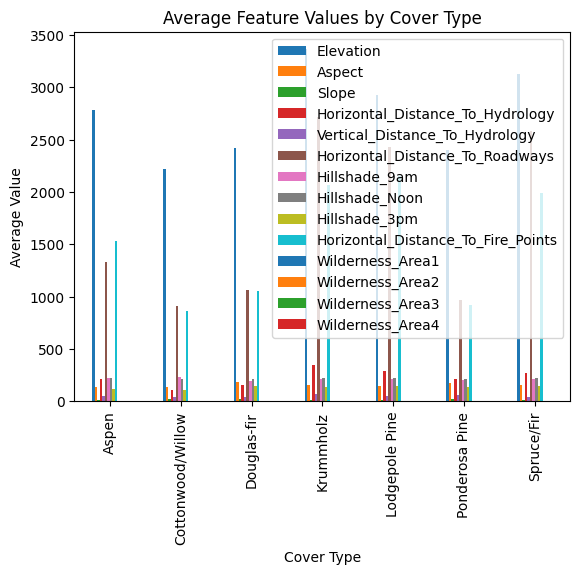

In [38]:
# Create a bar plot for the average 'Cover_Type' values by feature
plt.figure(figsize=(12, 8))
data.groupby('Cover_Type').mean().plot(kind='bar')
plt.title('Average Feature Values by Cover Type')
plt.xlabel('Cover Type')
plt.ylabel('Average Value')
plt.show()

In [39]:
# Set the figure size and style
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')

<Figure size 1200x800 with 0 Axes>

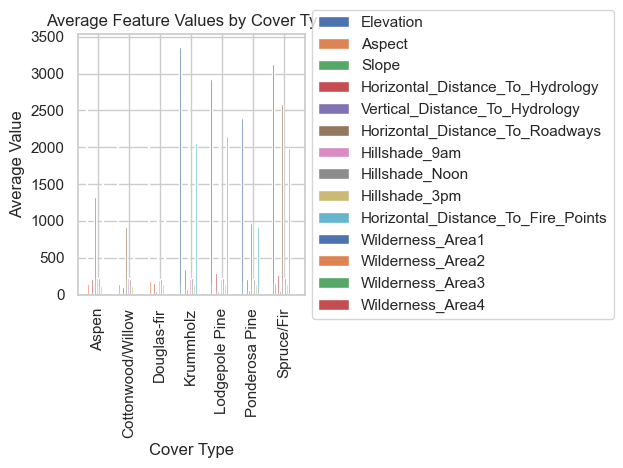

In [42]:
# Create a bar plot for the average 'Cover_Type' values by feature
ax = data.groupby('Cover_Type').mean().plot(kind='bar', width=0.8)

# Set plot title and axes labels
plt.title('Average Feature Values by Cover Type')
plt.xlabel('Cover Type')
plt.ylabel('Average Value')

# Move the legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()